# Stable Baselines3 Tutorial - Getting Started

Github repo: https://github.com/araffin/rl-tutorial-jnrr19/tree/sb3/

Stable-Baselines3: https://github.com/DLR-RM/stable-baselines3

Documentation: https://stable-baselines3.readthedocs.io/en/master/

RL Baselines3 zoo: https://github.com/DLR-RM/rl-baselines3-zoo

[RL Baselines3 Zoo](https://github.com/DLR-RM/rl-baselines3-zoo) is a collection of pre-trained Reinforcement Learning agents using Stable-Baselines3.

It also provides basic scripts for training, evaluating agents, tuning hyperparameters and recording videos.


## Introduction

In this notebook, you will learn the basics for using stable baselines library: how to create a RL model, train it and evaluate it. Because all algorithms share the same interface, we will see how simple it is to switch from one algorithm to another.


## Install Dependencies and Stable Baselines3 Using Pip

List of full dependencies can be found in the [README](https://github.com/DLR-RM/stable-baselines3).


```
pip install stable-baselines3[extra]
```

In [1]:
!sudo apt-get install -y ffmpeg freeglut3-dev xvfb  # For visualization

Reading package lists... Done
Building dependency tree       
Reading state information... Done
freeglut3-dev is already the newest version (2.8.1-3).
freeglut3-dev set to manually installed.
ffmpeg is already the newest version (7:3.4.8-0ubuntu0.2).
The following NEW packages will be installed:
  xvfb
0 upgraded, 1 newly installed, 0 to remove and 13 not upgraded.
Need to get 784 kB of archives.
After this operation, 2,270 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 xvfb amd64 2:1.19.6-1ubuntu4.8 [784 kB]
Fetched 784 kB in 1s (657 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to fron

In [9]:
#!apt-get install ffmpeg freeglut3-dev xvfb  # For visualization
!pip install stable-baselines3[extra]==v0.10.0

     |████████████████████████████████| 153kB 8.4MB/s 


In [2]:
!lsb_release -a

No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 18.04.5 LTS
Release:	18.04
Codename:	bionic


In [3]:
# Determine CUDA version at /usr/local/cuda
!ls -ld /usr/local/cuda*
import os
import re
m = re.search(r'^cuda-(?P<cuda_version>.*)', os.path.basename(os.path.realpath('/usr/local/cuda')))
cuda_version = m.group('cuda_version')
cu_version = re.sub('\.', '', cuda_version)
cu_suffix = "+cu{ver}".format(ver=cu_version)

lrwxrwxrwx  1 root root    9 Jan 20 17:22 /usr/local/cuda -> cuda-10.1
drwxr-xr-x 16 root root 4096 Jan 20 17:19 /usr/local/cuda-10.0
drwxr-xr-x  1 root root 4096 Jan 20 17:21 /usr/local/cuda-10.1


In [4]:
# 1. Get version of torch installed with stable-baselines3
# 2. Re-install torch with CUDA version that matches /usr/local/cuda
import torch
import re
torch_version = re.sub(r"\+cu.*$", "", torch.__version__)
!pip uninstall -y torch
torch_version = "torch=={ver}{cu}".format(
    ver=torch_version, 
    cu=cu_suffix)
!pip install $torch_version -f https://download.pytorch.org/whl/torch_stable.html

Uninstalling torch-1.7.0+cu101:
  Successfully uninstalled torch-1.7.0+cu101
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 735.3MB 25kB/s 


In [38]:
# RL-Scope external dependencies.
!sudo apt install -y texlive-extra-utils
!sudo apt install -y poppler-utils
# Useful for inspecting trace file directories.
!sudo apt install -y tree

Reading package lists... Done
Building dependency tree       
Reading state information... Done
texlive-extra-utils is already the newest version (2017.20180305-2).
0 upgraded, 0 newly installed, 0 to remove and 13 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 13 not upgraded.
Need to get 154 kB of archives.
After this operation, 613 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 poppler-utils amd64 0.62.0-2ubuntu2.12 [154 kB]
Fetched 154 kB in 1s (199 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readli

In [36]:
rlscope_version = '0.0.1'
rlscope_pip_version = "rlscope=={ver}{cu}".format(
    ver=rlscope_version, 
    cu=cu_suffix)
!pip uninstall -y rlscope || true
!pip install $rlscope_pip_version -f https://uoft-ecosystem.github.io/rlscope/whl

Uninstalling rlscope-0.0.1+cu101:
  Successfully uninstalled rlscope-0.0.1+cu101
Looking in links: https://uoft-ecosystem.github.io/rlscope/whl
     |████████████████████████████████| 26.6MB 1.3MB/s 


## Imports

Stable-Baselines3 works on environments that follow the [gym interface](https://stable-baselines3.readthedocs.io/en/master/guide/custom_env.html).
You can find a list of available environment [here](https://gym.openai.com/envs/#classic_control).

It is also recommended to check the [source code](https://github.com/openai/gym) to learn more about the observation and action space of each env, as gym does not have a proper documentation.
Not all algorithms can work with all action spaces, you can find more in this [recap table](https://stable-baselines3.readthedocs.io/en/master/guide/algos.html)

In [10]:
import gym
import numpy as np

The first thing you need to import is the RL model, check the documentation to know what you can use on which problem

In [12]:
from stable_baselines3 import PPO

The next thing you need to import is the policy class that will be used to create the networks (for the policy/value functions).
This step is optional as you can directly use strings in the constructor: 

```PPO('MlpPolicy', env)``` instead of ```PPO(MlpPolicy, env)```

Note that some algorithms like `SAC` have their own `MlpPolicy`, that's why using string for the policy is the recommened option.

In [14]:
from stable_baselines3.ppo.policies import MlpPolicy

## Create the Gym env and instantiate the agent

For this example, we will use CartPole environment, a classic control problem.

"A pole is attached by an un-actuated joint to a cart, which moves along a frictionless track. The system is controlled by applying a force of +1 or -1 to the cart. The pendulum starts upright, and the goal is to prevent it from falling over. A reward of +1 is provided for every timestep that the pole remains upright. "

Cartpole environment: [https://gym.openai.com/envs/CartPole-v1/](https://gym.openai.com/envs/CartPole-v1/)

![Cartpole](https://cdn-images-1.medium.com/max/1143/1*h4WTQNVIsvMXJTCpXm_TAw.gif)


We chose the MlpPolicy because the observation of the CartPole task is a feature vector, not images.

The type of action to use (discrete/continuous) will be automatically deduced from the environment action space

Here we are using the [Proximal Policy Optimization](https://stable-baselines3.readthedocs.io/en/master/modules/ppo2.html) algorithm, which is an Actor-Critic method: it uses a value function to improve the policy gradient descent (by reducing the variance).

It combines ideas from [A2C](https://stable-baselines3.readthedocs.io/en/master/modules/a2c.html) (having multiple workers and using an entropy bonus for exploration) and [TRPO](https://stable-baselines.readthedocs.io/en/master/modules/trpo.html) (it uses a trust region to improve stability and avoid catastrophic drops in performance).

PPO is an on-policy algorithm, which means that the trajectories used to update the networks must be collected using the latest policy.
It is usually less sample efficient than off-policy alorithms like [DQN](https://stable-baselines.readthedocs.io/en/master/modules/dqn.html), [SAC](https://stable-baselines3.readthedocs.io/en/master/modules/sac.html) or [TD3](https://stable-baselines3.readthedocs.io/en/master/modules/td3.html), but is much faster regarding wall-clock time.


In [15]:
env = gym.make('CartPole-v1')

model = PPO(MlpPolicy, env, verbose=0)

We create a helper function to evaluate the agent:

In [16]:
def evaluate(model, num_episodes=100):
    """
    Evaluate a RL agent
    :param model: (BaseRLModel object) the RL Agent
    :param num_episodes: (int) number of episodes to evaluate it
    :return: (float) Mean reward for the last num_episodes
    """
    # This function will only work for a single Environment
    env = model.get_env()
    all_episode_rewards = []
    for i in range(num_episodes):
        episode_rewards = []
        done = False
        obs = env.reset()
        while not done:
            # _states are only useful when using LSTM policies
            action, _states = model.predict(obs)
            # here, action, rewards and dones are arrays
            # because we are using vectorized env
            obs, reward, done, info = env.step(action)
            episode_rewards.append(reward)

        all_episode_rewards.append(sum(episode_rewards))

    mean_episode_reward = np.mean(all_episode_rewards)
    print("Mean reward:", mean_episode_reward, "Num episodes:", num_episodes)

    return mean_episode_reward

Let's evaluate the un-trained agent, this should be a random agent.

In [17]:
# Random Agent, before training
mean_reward_before_train = evaluate(model, num_episodes=100)

Mean reward: 21.39 Num episodes: 100


Stable-Baselines already provides you with that helper:

In [18]:
from stable_baselines3.common.evaluation import evaluate_policy

In [19]:
mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=100)

print(f"mean_reward:{mean_reward:.2f} +/- {std_reward:.2f}")

mean_reward:118.29 +/- 75.02


## Train the agent and evaluate it

In [20]:
# Train the agent for 10000 steps
model.learn(total_timesteps=10000)

In [21]:
# Evaluate the trained agent
mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=100)

print(f"mean_reward:{mean_reward:.2f} +/- {std_reward:.2f}")

mean_reward:448.10 +/- 79.86


Apparently the training went well, the mean reward increased a lot ! 

#RL-Scope
Lets annotate the evaluation inference loop with RL-Scope annotations to understand where time is spent.

In [22]:
# !rls-prof --help
!pip freeze | grep torch

torch==1.7.0+cu101
torchsummary==1.5.1
torchtext==0.3.1
torchvision==0.8.1+cu101


In [65]:
%%writefile test_writefile.py
import gym
import numpy as np
from stable_baselines3 import PPO
from stable_baselines3.ppo.policies import MlpPolicy

import argparse

import rlscope.api as rlscope

def main():
    parser = argparse.ArgumentParser(description="Evaluate an RL policy")
    rlscope.add_rlscope_arguments(parser)
    args = parser.parse_args()
    
    rlscope.handle_rlscope_args(
        parser=parser,
        args=args,
    )
    rlscope.prof.set_metadata({
        'algo': 'PPO',
        'env': 'CartPole-v1',
    })
    process_name = 'PPO_CartPole'
    phase_name = process_name
    
    env = gym.make('CartPole-v1')
    model = PPO(MlpPolicy, env, verbose=0)
    
    # Random Agent, before training
    with rlscope.prof.profile(process_name=process_name, phase_name=phase_name):
        mean_reward_before_train = evaluate_rlscope(model, 
                                                    # num_episodes=10000,
                                                    # num_episodes=1000,
                                                    num_episodes=100,
                                                   )


def evaluate_rlscope(model, num_episodes=100):
    """
    Evaluate a RL agent
    :param model: (BaseRLModel object) the RL Agent
    :param num_episodes: (int) number of episodes to evaluate it
    :return: (float) Mean reward for the last num_episodes
    """
    # This function will only work for a single Environment
    env = model.get_env()
    all_episode_rewards = []

    with rlscope.prof.operation('training_loop'):
        for i in range(num_episodes):
            
            # rlscope.prof.report_progress(
            #     percent_complete=i/float(num_episodes),
            #     num_timesteps=i,
            #     total_timesteps=num_episodes)
            
            episode_rewards = []
            done = False
            obs = env.reset()
            while not done:
                with rlscope.prof.operation('inference'):
                    # _states are only useful when using LSTM policies
                    action, _states = model.predict(obs)
                with rlscope.prof.operation('step'):
                    # here, action, rewards and dones are arrays
                    # because we are using vectorized env
                    obs, reward, done, info = env.step(action)
                    episode_rewards.append(reward)

            all_episode_rewards.append(sum(episode_rewards))

    mean_episode_reward = np.mean(all_episode_rewards)
    print("Mean reward:", mean_episode_reward, "Num episodes:", num_episodes)

    return mean_episode_reward

if __name__ == '__main__':
    main()

Overwriting test_writefile.py


In [27]:
# Delete any trace files from previous runs of this notebook.
!rm -rf ./rlscope_tutorial

In [74]:
# Collect RL-Scope traces from the program using the added annotations.
# Your training script will be run multiple times to calibrate for overhead correction.
# If you have multiple GPUs, experiments will be run across available GPUs.
!rls-prof python test_writefile.py --rlscope-directory ./rlscope_tutorial

> CMD:
  $ rls-calibrate run --parallel-runs python test_writefile.py --rlscope-directory ./rlscope_tutorial
  PWD=/content
[TerminalIPythonApp] WARNING | GUI event loop or pylab initialization failed

UnknownBackendTraceback (most recent call last)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py in enable_matplotlib(self, gui)
   2953         # Now we must activate the gui pylab wants to use, and fix %run to take
   2954         # plot updates into account
-> 2955         self.enable_gui(gui)
   2956         self.magics_manager.registry['ExecutionMagics'].default_runner = \
   2957             pt.mpl_runner(self.safe_execfile)

/usr/local/lib/python3.6/dist-packages/IPython/terminal/interactiveshell.py in enable_gui(self, gui)
    512         if gui:
    513             self.active_eventloop, self._inputhook =\
--> 514                 get_inputhook_name_and_func(gui)
    515         else:
    516             self.active_eventloop = self._inputhook = None

/usr/

In [77]:
# Look at the plot files generated by RL-Scope
!ls -l ./rlscope_tutorial/*.png
# !tree ./rlscope_tutorial
# !ls -l ./rlscope_tutorial/{**/,}*.{pdf,png}
# !rm ./rlscope_tutorial/CategoryTransitionPlotTask.logfile.out

-rw-r--r-- 1 root root 25832 Feb  2 05:01 ./rlscope_tutorial/CategoryTransitionPlot.category_cuda_api_cpu.png
-rw-r--r-- 1 root root 36421 Feb  2 05:01 ./rlscope_tutorial/CategoryTransitionPlot.category_framework_api_c.png
-rw-r--r-- 1 root root 28132 Feb  2 05:01 ./rlscope_tutorial/CategoryTransitionPlot.combined.png
-rw-r--r-- 1 root root 31572 Feb  2 04:04 ./rlscope_tutorial/cupti_scaling_overhead.png
-rw-r--r-- 1 root root 24750 Feb  2 04:04 ./rlscope_tutorial/cupti_scaling_overhead.training_loop.png
-rw-r--r-- 1 root root 62848 Feb  2 04:38 ./rlscope_tutorial/OverlapStackedBarPlot.overlap_type_CategoryOverlap.operation_training_time.png
-rw-r--r-- 1 root root 62848 Feb  2 04:38 ./rlscope_tutorial/OverlapStackedBarPlot.overlap_type_CategoryOverlap.operation_training_time.yerr.png
-rw-r--r-- 1 root root 62238 Feb  2 04:38 ./rlscope_tutorial/OverlapStackedBarPlot.overlap_type_CategoryOverlap.percent.png
-rw-r--r-- 1 root root 62238 Feb  2 04:38 ./rlscope_tutorial/OverlapStackedBarPlo

'./rlscope_tutorial/OverlapStackedBarPlot.overlap_type_CategoryOverlap.operation_training_time.png'

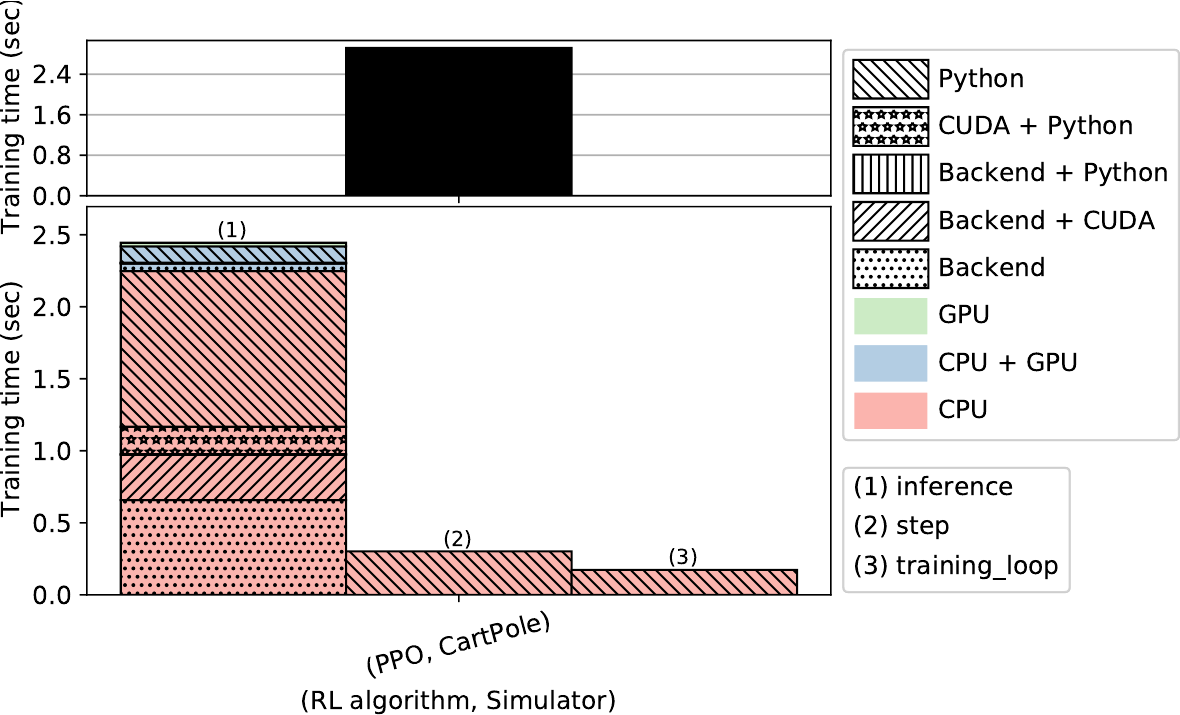

'./rlscope_tutorial/CategoryTransitionPlot.combined.png'

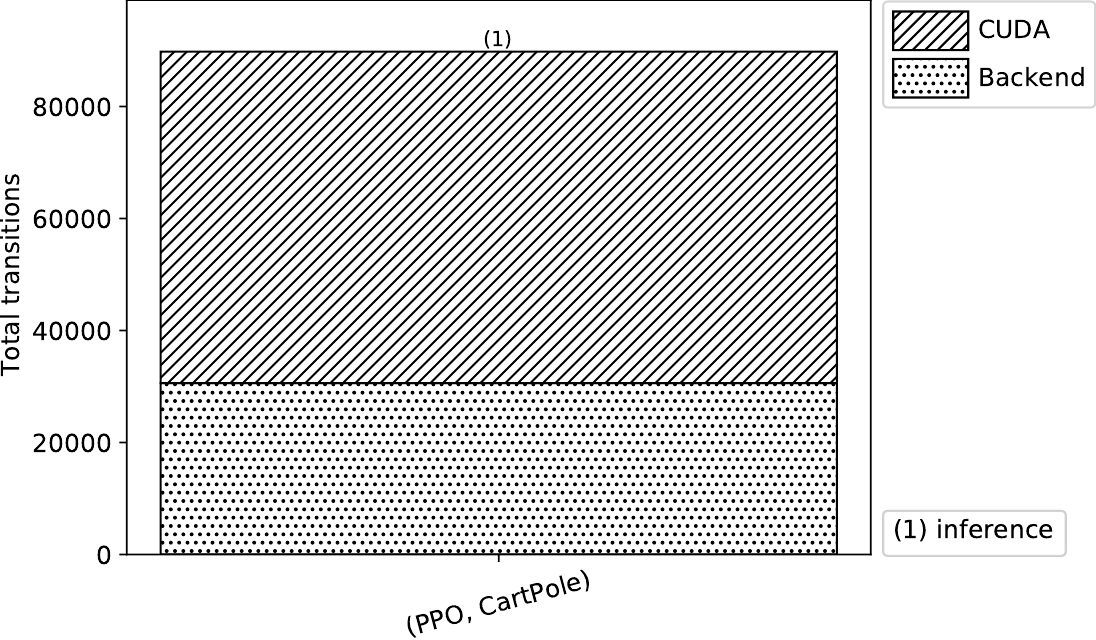

In [78]:
from IPython.core.display import display
from IPython.display import IFrame
from IPython.display import Image

from glob import glob

def display_pdfs(glob_expr):
    """
    Display all PDFs found in file glob expansion.
    e.g. 
    """
    paths = glob(glob_expr)
    pdfs = []
    for path in paths:
        # pdfs.append(WImage(path))
        pdfs.append(IFrame(path, width="100%", height="500"))
    for path, pdf in zip(paths, pdfs):
        display(path)
        display(pdf)
    # return {'paths': paths, 'pdfs': pdfs}

# NOTE: using width="100%" doesn't work in collab...instead hardcode width.
IMAGE_WIDTH_PIXELS = 600
def display_imgs(glob_expr):
    """
    Display all PDFs found in file glob expansion.
    e.g. 
    """
    paths = glob(glob_expr)
    imgs = []
    for path in paths:
        imgs.append(Image(path, width=IMAGE_WIDTH_PIXELS))
    for path, img in zip(paths, imgs):
        display(path)
        display(img)
    # return {'paths': paths, 'imgs': imgs}

display_imgs('./rlscope_tutorial/*.operation_training_time.png')
display_imgs('./rlscope_tutorial/CategoryTransitionPlot.combined.png')

# display_pdfs('./rlscope_tutorial/*.operation_training_time.pdf')
# display_pdfs('./rlscope_tutorial/**/*.pdf')

### Prepare video recording

In [ ]:
# Set up fake display; otherwise rendering will fail
import os
os.system("Xvfb :1 -screen 0 1024x768x24 &")
os.environ['DISPLAY'] = ':1'

In [ ]:
import base64
from pathlib import Path

from IPython import display as ipythondisplay

def show_videos(video_path='', prefix=''):
  """
  Taken from https://github.com/eleurent/highway-env

  :param video_path: (str) Path to the folder containing videos
  :param prefix: (str) Filter the video, showing only the only starting with this prefix
  """
  html = []
  for mp4 in Path(video_path).glob("{}*.mp4".format(prefix)):
      video_b64 = base64.b64encode(mp4.read_bytes())
      html.append('''<video alt="{}" autoplay 
                    loop controls style="height: 400px;">
                    <source src="data:video/mp4;base64,{}" type="video/mp4" />
                </video>'''.format(mp4, video_b64.decode('ascii')))
  ipythondisplay.display(ipythondisplay.HTML(data="<br>".join(html)))

We will record a video using the [VecVideoRecorder](https://stable-baselines3.readthedocs.io/en/master/guide/vec_envs.html#vecvideorecorder) wrapper, you will learn about those wrapper in the next notebook.

In [ ]:
from stable_baselines3.common.vec_env import VecVideoRecorder, DummyVecEnv

def record_video(env_id, model, video_length=500, prefix='', video_folder='videos/'):
  """
  :param env_id: (str)
  :param model: (RL model)
  :param video_length: (int)
  :param prefix: (str)
  :param video_folder: (str)
  """
  eval_env = DummyVecEnv([lambda: gym.make(env_id)])
  # Start the video at step=0 and record 500 steps
  eval_env = VecVideoRecorder(eval_env, video_folder=video_folder,
                              record_video_trigger=lambda step: step == 0, video_length=video_length,
                              name_prefix=prefix)

  obs = eval_env.reset()
  for _ in range(video_length):
    action, _ = model.predict(obs)
    obs, _, _, _ = eval_env.step(action)

  # Close the video recorder
  eval_env.close()

### Visualize trained agent



In [ ]:
record_video('CartPole-v1', model, video_length=500, prefix='ppo2-cartpole')

In [ ]:
show_videos('videos', prefix='ppo2')

## Bonus: Train a RL Model in One Line

The policy class to use will be inferred and the environment will be automatically created. This works because both are [registered](https://stable-baselines3.readthedocs.io/en/master/guide/quickstart.html).

In [ ]:
model = PPO('MlpPolicy', "CartPole-v1", verbose=1).learn(1000)

## Conclusion

In this notebook we have seen:
- how to define and train a RL model using stable baselines3, it takes only one line of code ;)